# Electric Vehicle Population Data Analytics

### Dataset Description
This dataset shows the **Battery Electric Vehicles (BEVs)** and **Plug-in Hybrid Electric Vehicles (PHEVs)** that are currently registered through the Washington State Department of Licensing (DOL).  

- **Source**: [data.wa.gov](https://data.wa.gov/d/f6w7-q2d2)
- **Dataset**: Electric_Vehicle_Population_Data.csv
- **License**: Open Data Commons Open Database License (ODbL) v1.0  
- **Records**: 261,698  
- **Columns**: 17  

The dataset contains information about registered electric vehicles including VIN, County, City, State, Model Year, Make, Model, Electric Vehicle Type, Electric Range, and more.

---


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
import seaborn as sns
from pyspark.sql.functions import col, avg, min, max, count

# Load dataset with pandas
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
df.head()


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,0.0,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10
2,JM3KKBHA9R,Kitsap,Kingston,WA,98346.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,23.0,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303509e+10
3,7SAYGDEE8P,Thurston,Olympia,WA,98501.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,35.0,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EB5K,Thurston,Rainier,WA,98576.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,20.0,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [18]:
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())
print("\nSample rows:")
print(df.head())

print("\nTotal Vehicles:", len(df))
print("Unique Makes:", df['Make'].nunique())
print("Unique Models:", df['Model'].nunique())
print("Model Years Range:", df['Model Year'].min(), "-", df['Model Year'].max())


Shape of dataset: (261698, 17)
Columns: ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']

Sample rows:
   VIN (1-10)    County          City State  Postal Code  Model Year    Make  \
0  JTDKN3DP2D    Yakima        Yakima    WA      98902.0        2013  TOYOTA   
1  1FMCU0E1XS    Kitsap  Port Orchard    WA      98366.0        2025    FORD   
2  JM3KKBHA9R    Kitsap      Kingston    WA      98346.0        2024   MAZDA   
3  7SAYGDEE8P  Thurston       Olympia    WA      98501.0        2023   TESLA   
4  5YJ3E1EB5K  Thurston       Rainier    WA      98576.0        2019   TESLA   

     Model                   Electric Vehicle Type  \
0    PRIUS  Plug-in Hybrid Electric Vehicle (PHEV)   
1   ESCAPE  Plug-in Hybrid Electric Vehicle (PHEV)   
2  

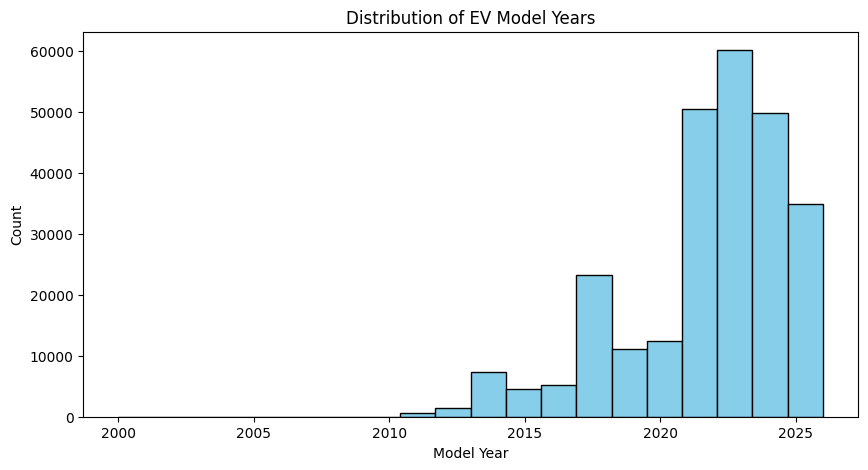

In [19]:
# Distribution of Model Years
plt.figure(figsize=(10,5))
plt.hist(df['Model Year'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of EV Model Years")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.show()




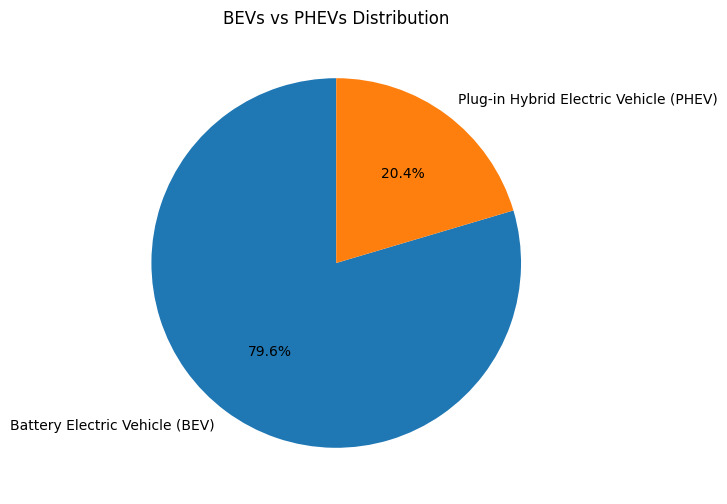

In [20]:
# BEVs vs PHEVs
ev_counts = df['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(ev_counts, labels=ev_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("BEVs vs PHEVs Distribution")
plt.show()


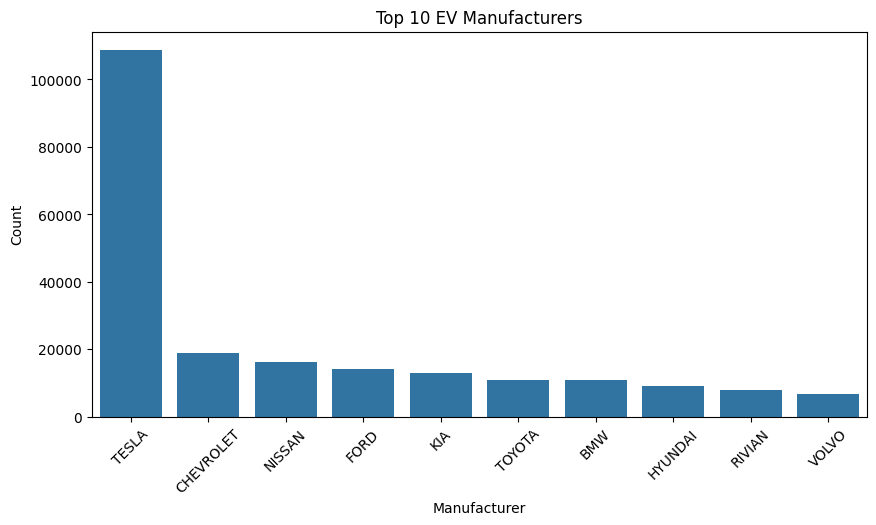

In [21]:
# Count of EVs by manufacturer (Top 10)
top_makes = df['Make'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_makes.index, y=top_makes.values)
plt.title("Top 10 EV Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

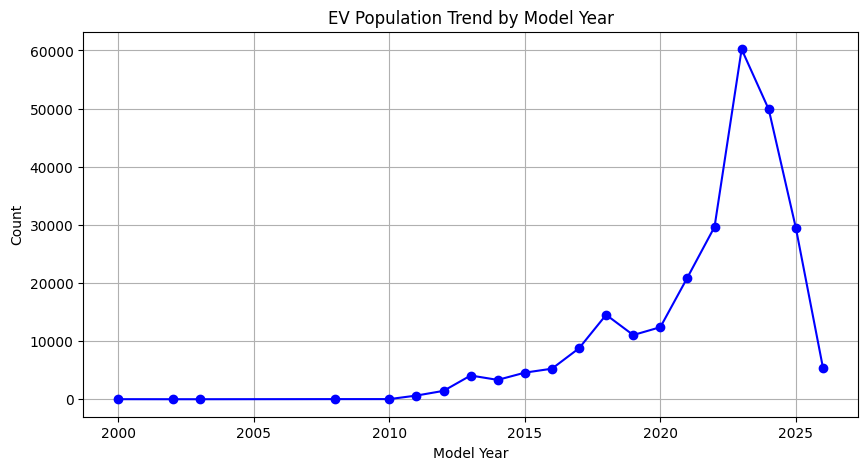

In [22]:
# EV population trend by year
year_count = df['Model Year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(year_count.index, year_count.values, marker="o", linestyle="-", color="blue")
plt.title("EV Population Trend by Model Year")
plt.xlabel("Model Year")
plt.ylabel("Count")
plt.grid(True)
plt.show()

C:\Users\akshay\AppData\Local\Temp\ipykernel_13576\3951046974.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_counties.index, x=top_counties.values, palette="coolwarm")


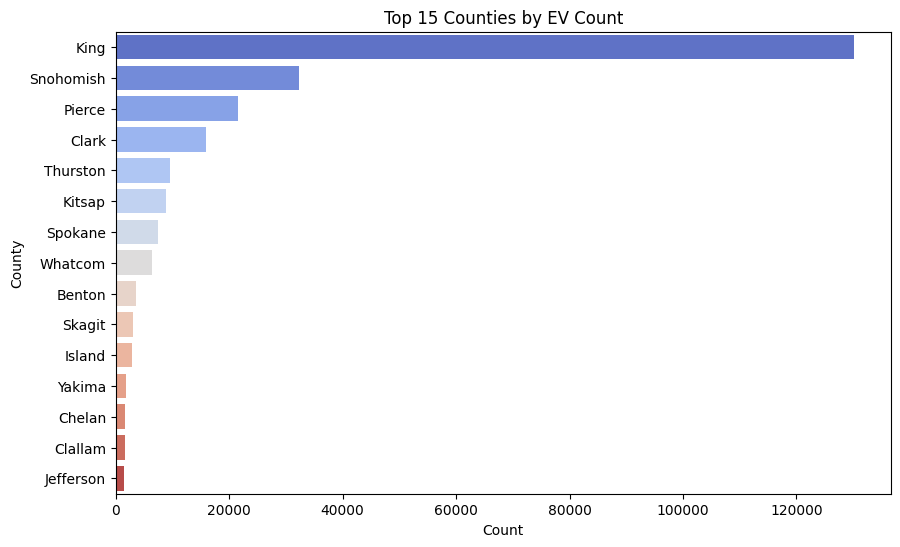

In [23]:
# EV count by county (Top 15)
top_counties = df['County'].value_counts().head(15)
plt.figure(figsize=(10,6))
sns.barplot(y=top_counties.index, x=top_counties.values, palette="coolwarm")
plt.title("Top 15 Counties by EV Count")
plt.xlabel("Count")
plt.ylabel("County")
plt.show()

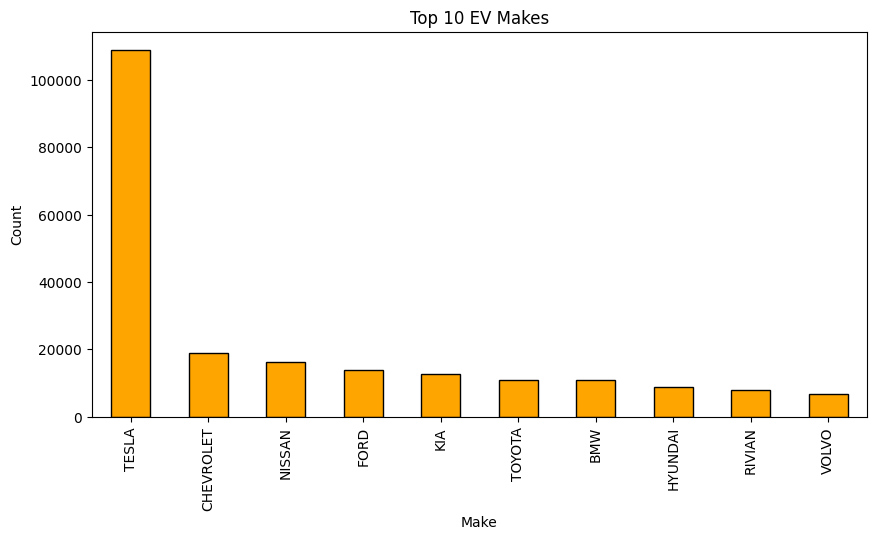

In [24]:

# Top 10 EV Makes
top_makes = df['Make'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_makes.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 EV Makes")
plt.xlabel("Make")
plt.ylabel("Count")
plt.show()


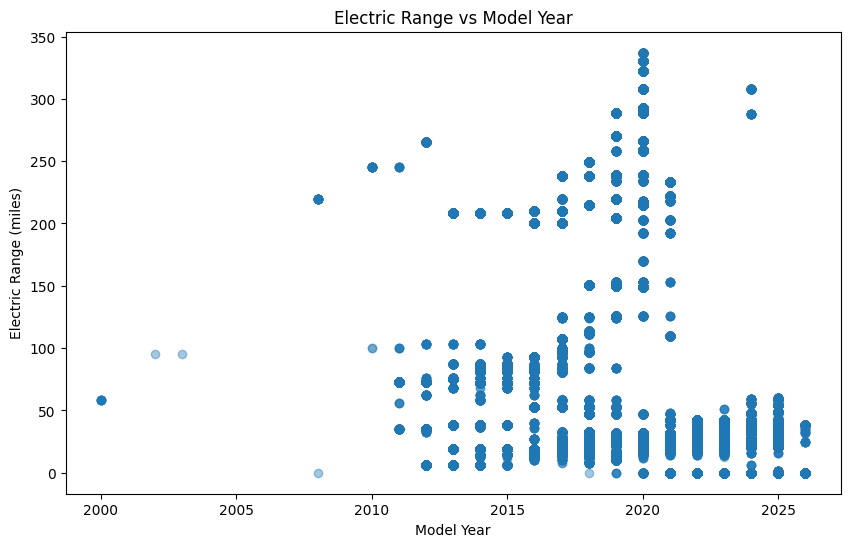

In [25]:
# Scatter: Electric Range vs Model Year
plt.figure(figsize=(10,6))
plt.scatter(df['Model Year'], df['Electric Range'], alpha=0.4)
plt.title("Electric Range vs Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range (miles)")
plt.show()

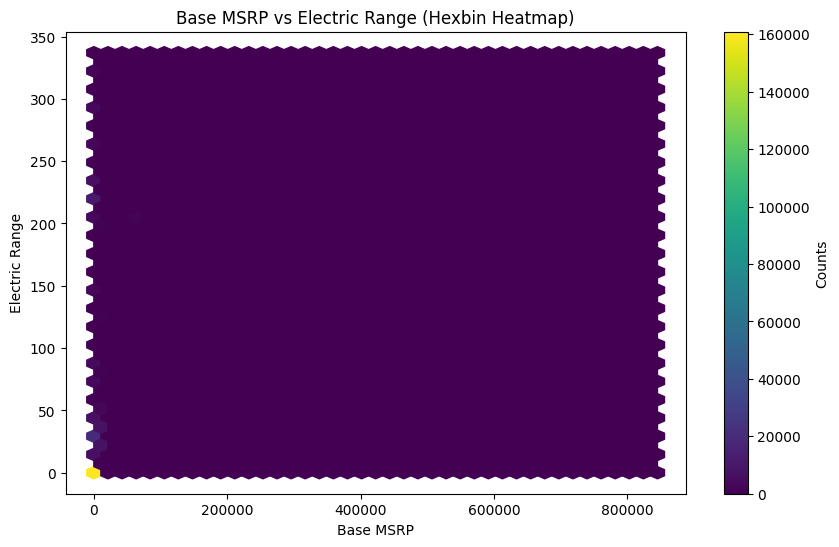

In [26]:
# Hexbin: Base MSRP vs Electric Range
plt.figure(figsize=(10,6))
plt.hexbin(df['Base MSRP'].fillna(0), df['Electric Range'].fillna(0), gridsize=40, cmap="viridis")
plt.colorbar(label="Counts")
plt.title("Base MSRP vs Electric Range (Hexbin Heatmap)")
plt.xlabel("Base MSRP")
plt.ylabel("Electric Range")
plt.show()

C:\Users\akshay\AppData\Local\Temp\ipykernel_11600\1811219878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Electric Vehicle Type", y="Electric Range", data=df, showfliers=False, palette="Set2")


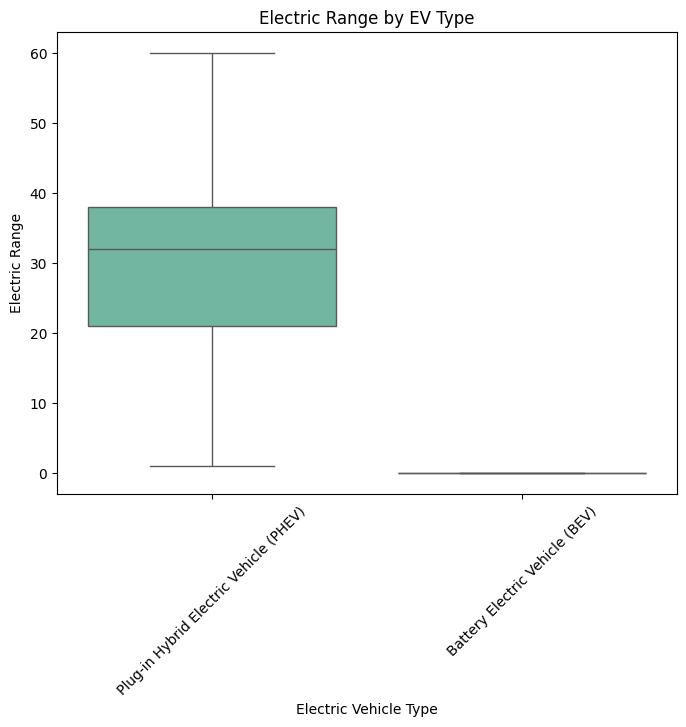

In [38]:
# Boxplot: Electric Range by EV Type
plt.figure(figsize=(8,6))
sns.boxplot(x="Electric Vehicle Type", y="Electric Range", data=df, showfliers=False, palette="Set2")
plt.title("Electric Range by EV Type")
plt.xticks(rotation=45)
plt.show()

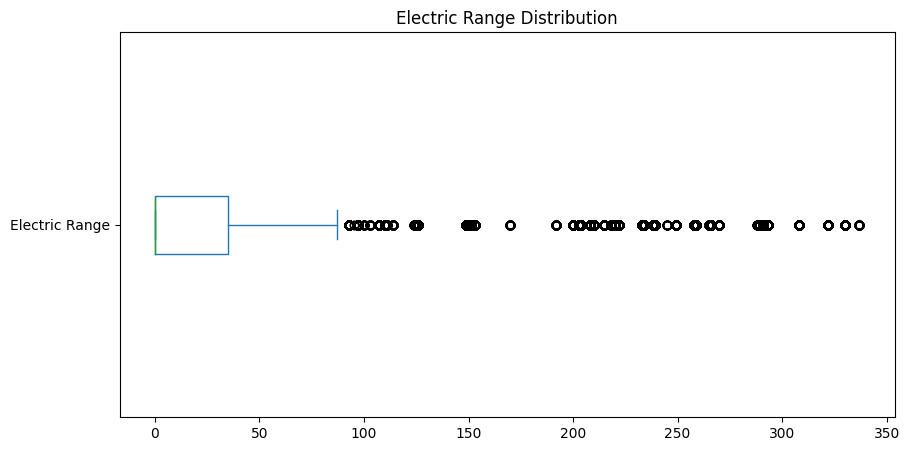

In [27]:

# 4. Electric Range Distribution
plt.figure(figsize=(10,5))
df['Electric Range'].plot(kind='box', vert=False)
plt.title("Electric Range Distribution")
plt.show()

In [71]:
import os
import glob
import shutil
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql import SparkSession
os.environ['HADOOP_HOME'] = "C:\\tmp\\hadoop"

In [72]:
spark = SparkSession.builder \
    .appName("EV Analysis") \
    .config("spark.hadoop.io.native.lib.available", "false") \
    .getOrCreate()

In [73]:
# Load dataset into Spark
df_spark = spark.read.csv("Electric_Vehicle_Population_Data.csv", header=True, inferSchema=True)

In [74]:
# Quick overview
print("Schema:")
df_spark.printSchema()

Schema:
root
 |-- VIN (1-10): string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Postal Code: integer (nullable = true)
 |-- Model Year: integer (nullable = true)
 |-- Make: string (nullable = true)
 |-- Model: string (nullable = true)
 |-- Electric Vehicle Type: string (nullable = true)
 |-- Clean Alternative Fuel Vehicle (CAFV) Eligibility: string (nullable = true)
 |-- Electric Range: integer (nullable = true)
 |-- Base MSRP: integer (nullable = true)
 |-- Legislative District: integer (nullable = true)
 |-- DOL Vehicle ID: integer (nullable = true)
 |-- Vehicle Location: string (nullable = true)
 |-- Electric Utility: string (nullable = true)
 |-- 2020 Census Tract: long (nullable = true)



In [75]:
print("First 5 rows:")
df_spark.show(5)

First 5 rows:
+----------+--------+------------+-----+-----------+----------+------+-------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|VIN (1-10)|  County|        City|State|Postal Code|Model Year|  Make|  Model|Electric Vehicle Type|Clean Alternative Fuel Vehicle (CAFV) Eligibility|Electric Range|Base MSRP|Legislative District|DOL Vehicle ID|    Vehicle Location|    Electric Utility|2020 Census Tract|
+----------+--------+------------+-----+-----------+----------+------+-------+---------------------+-------------------------------------------------+--------------+---------+--------------------+--------------+--------------------+--------------------+-----------------+
|JTDKN3DP2D|  Yakima|      Yakima|   WA|      98902|      2013|TOYOTA|  PRIUS| Plug-in Hybrid El...|                             Not eligible due ...|             6|     

In [76]:
# Total number of vehicles
print("Total vehicles:", df_spark.count())

Total vehicles: 261698


In [77]:
# Distinct Makes
print("Distinct Makes:", df_spark.select("Make").distinct().count())

Distinct Makes: 46


In [78]:
# Vehicles by Type (BEV vs PHEV)
df_spark.groupBy("Electric Vehicle Type").count().show()

+---------------------+------+
|Electric Vehicle Type| count|
+---------------------+------+
| Plug-in Hybrid El...| 53417|
| Battery Electric ...|208281|
+---------------------+------+



In [79]:
# Vehicles by Year
df_spark.groupBy("Model Year").count().orderBy("Model Year").show()

+----------+-----+
|Model Year|count|
+----------+-----+
|      2000|    8|
|      2002|    1|
|      2003|    1|
|      2008|   20|
|      2010|   22|
|      2011|  631|
|      2012| 1440|
|      2013| 4081|
|      2014| 3327|
|      2015| 4574|
|      2016| 5253|
|      2017| 8767|
|      2018|14524|
|      2019|11043|
|      2020|12395|
|      2021|20937|
|      2022|29647|
|      2023|60215|
|      2024|49869|
|      2025|29495|
+----------+-----+
only showing top 20 rows


In [80]:
# Vehicles by Make (Top 10)
df_spark.groupBy("Make").count().orderBy(col("count").desc()).show(10)

+---------+------+
|     Make| count|
+---------+------+
|    TESLA|108777|
|CHEVROLET| 18908|
|   NISSAN| 16224|
|     FORD| 13988|
|      KIA| 12849|
|   TOYOTA| 10845|
|      BMW| 10809|
|  HYUNDAI|  8936|
|   RIVIAN|  7932|
|    VOLVO|  6797|
+---------+------+
only showing top 10 rows


In [81]:
# Min and Max Electric Range
df_spark.agg(min("Electric Range").alias("min_range"), max("Electric Range").alias("max_range"), avg("Electric Range").alias("avg_range")).show()

+---------+---------+-----------------+
|min_range|max_range|        avg_range|
+---------+---------+-----------------+
|        0|      337|42.61507097957546|
+---------+---------+-----------------+



In [82]:
# Filter Tesla vehicles
df_spark.filter(col("Make") == "TESLA").select("Model Year","Model","Electric Range").show(5)

+----------+-------+--------------+
|Model Year|  Model|Electric Range|
+----------+-------+--------------+
|      2023|MODEL Y|             0|
|      2019|MODEL 3|           220|
|      2019|MODEL 3|           220|
|      2017|MODEL S|           210|
|      2018|MODEL S|           249|
+----------+-------+--------------+
only showing top 5 rows


In [84]:
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")
ev_2020 = df[df["Model Year"] > 2020]
ev_2020.to_csv(r"D:\EvAnalysis\Processed\EVs_After2020.csv", index=False)

# Conclusion

- The dataset contains over **260,000 registered EVs** in Washington State.  
- **BEVs dominate** the population, with Tesla being the leading manufacturer.  
- EV adoption has grown significantly since **2018**, with rapid growth in 2020–2024.  
- **Electric Range varies widely**, with BEVs typically offering higher ranges than PHEVs.  
- Washington counties like King and Snohomish have the **highest EV concentration**.  

This dataset is valuable for studying EV adoption trends, infrastructure planning, and clean energy initiatives.  
